In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x. reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
X2[:5,:]

array([[ 1.        , -1.34284888,  1.80324311],
       [ 1.        , -0.18985858,  0.03604628],
       [ 1.        , -1.58563134,  2.51422675],
       [ 1.        ,  1.2149354 ,  1.47606802],
       [ 1.        , -2.05874706,  4.23843944]])

In [7]:
X[:5,:]

array([[-1.34284888],
       [-0.18985858],
       [-1.58563134],
       [ 1.2149354 ],
       [-2.05874706]])

第一列是1，第二列是原数据，第三列是原数据的平方

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

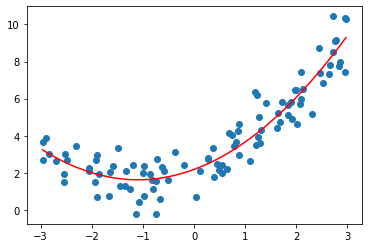

In [10]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [12]:
lin_reg2.coef_   #0是对X2是第一列数据拟合的结果

array([0.        , 1.01723515, 0.46407147])

In [14]:
lin_reg2.intercept_

2.1789150996943945

### 关于PolynomialFeatures

In [17]:
X = np.arange(1,11).reshape(-1, 2)
X.shape

(5, 2)

In [18]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [20]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(5, 6)

In [21]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

第一列：1，即0次幂
第二列：x1，1次幂
第三列：x2，1次幂
第四列：x1^2，2次幂
第五列：x1*x2，2次幂
第六列：x2^2，2次幂

In [23]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)
X3.shape

(5, 10)

In [24]:
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

### Pipeline

把多项式特征、数据规一化、线性回归三步合在一起，使得不需要在每一次调用时都重复这三步

In [26]:
x = np.random.uniform(-3, 3, size=100)
X = x. reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [29]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

sklearn没有直接提供多项式回归算法，但可以使用pipe很方便地创建一个多项式回归算法

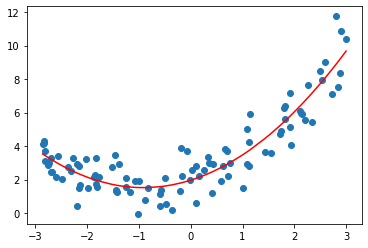

In [30]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()